In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from wordcloud import WordCloud
import sys
sys.path.append('../')
from helpers import *

data_path = './../../../data'

In [2]:
rb_dir = os.path.join(data_path, 'RateBeer')
exp_stems_per_cat = get_exp_stems(data_path)
rev_with_scores_rb = pd.read_pickle(os.path.join(rb_dir, 'rev_w_scores.pkl'))
exp_dict = get_exp_dict_stems(data_path)


In [3]:
def compute_word_occ(df, word_occ):
    for x in df:
        if len(x)<1:
            continue
        for word in x:
            if word in word_occ.keys():
                word_occ[word]+= 1
            else: 
                word_occ[word]= 1
    return word_occ

In [4]:
word_occ = {}
word_occ = compute_word_occ(rev_with_scores_rb.stems, word_occ)

In [5]:
del rev_with_scores_rb

In [6]:
ba_dir = os.path.join(data_path, 'BeerAdvocate')
rev_with_scores_ba = pd.read_pickle(os.path.join(ba_dir, 'rev_w_scores.pkl'))

In [7]:
word_occ = compute_word_occ(rev_with_scores_ba.stems, word_occ)

In [8]:
del rev_with_scores_ba

In [9]:
for key in exp_dict:
    if exp_dict[key] in word_occ.keys():
        exp_dict[key]= word_occ[exp_dict[key]]
    else:
        print(key)
        exp_dict[key]= 0

full-bodied
medium-bodied
light-bodied
well-integrated
world-class
off-white


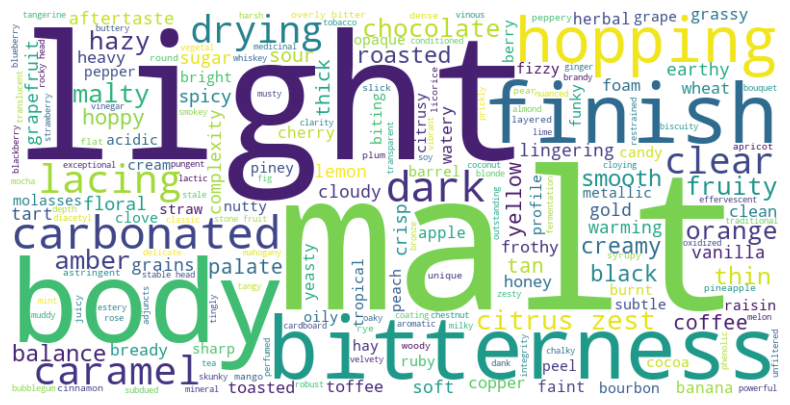

In [10]:
wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    colormap='viridis'
).generate_from_frequencies(exp_dict)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.show()


## Category Distribution

In [11]:
cat_distribution= {}
for key, terms in exp_stems_per_cat.items():
    cat_distribution[key] = 0
    for term in terms:
        if term in word_occ.keys():
            cat_distribution[key] += word_occ[term]

In [12]:
tot_occ = sum(cat_distribution.values())
cat_dist_perc= {}
for key in cat_distribution:
    cat_dist_perc[key] =  cat_distribution[key]/tot_occ

In [13]:
cat_dist_perc

{'flavor': 0.37432970362603746,
 'mouthfeel': 0.18275120581797474,
 'brewing': 0.0927799070320068,
 'technical': 0.10952960106716399,
 'appearance': 0.21004863911222044,
 'off_flavors': 0.030560943344596584}

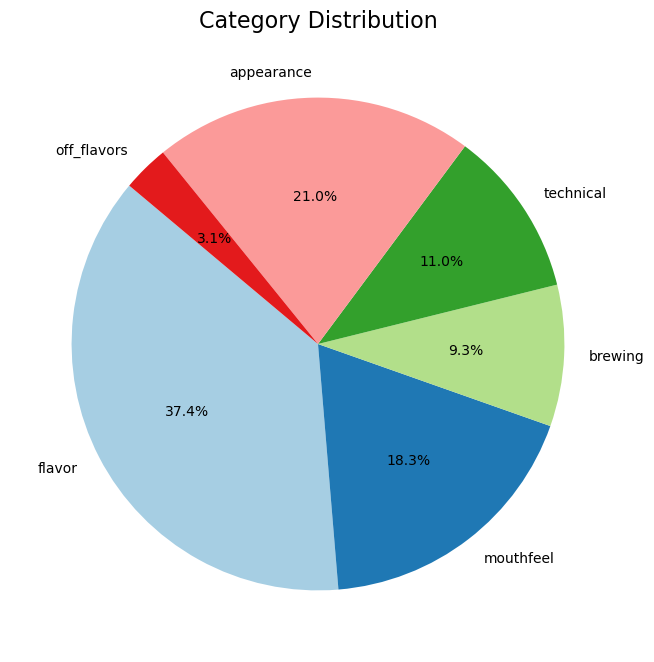

In [14]:
plt.figure(figsize=(8, 8))
plt.pie(
    cat_dist_perc.values(),
    labels=cat_dist_perc.keys(),
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title("Category Distribution", fontsize=16)
plt.show()

/var/folders/y0/lnx9fwjn5c75w4wndjtsp_4h0000gn/T/ipykernel_65994/1862211935.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores, y=attributes, palette="viridis")


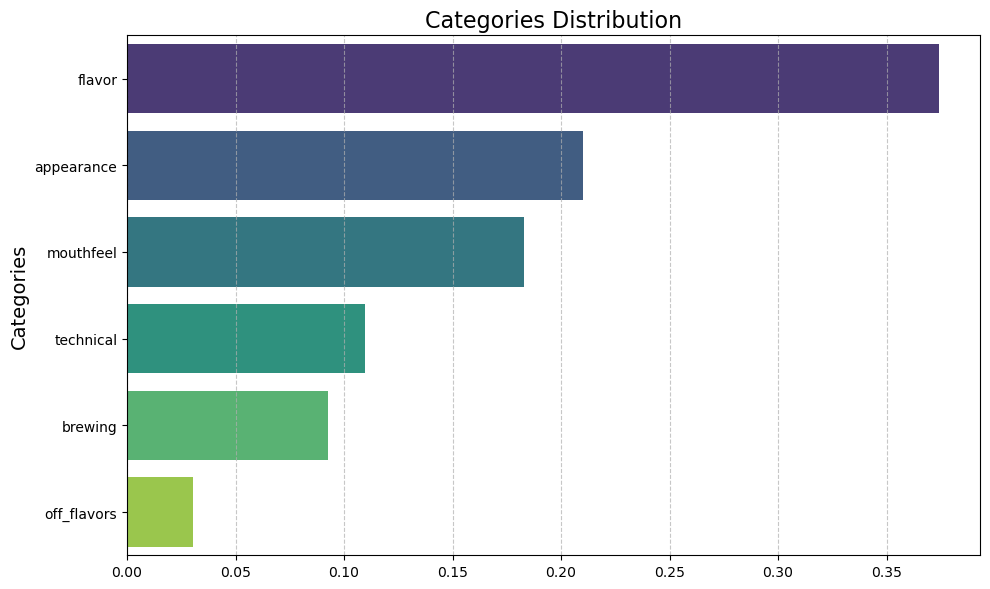

In [15]:
import seaborn as sns
# Data Preparation
sorted_data = dict(sorted(cat_dist_perc.items(), key=lambda x: x[1], reverse=True))
attributes = list(sorted_data.keys())
scores = list(sorted_data.values())

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=scores, y=attributes, palette="viridis")
plt.title("Categories Distribution", fontsize=16)
plt.ylabel("Categories", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Category Word Distribution

In [16]:
cat_words_distribution= {}
for key, terms in exp_stems_per_cat.items():
    cat_words_distribution[key] = {}
    for term in terms:
        if term in word_occ.keys():
            cat_words_distribution[key][term] = word_occ[term]/cat_distribution[key]

/var/folders/y0/lnx9fwjn5c75w4wndjtsp_4h0000gn/T/ipykernel_65994/3495410594.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores, y=attributes, palette="viridis")


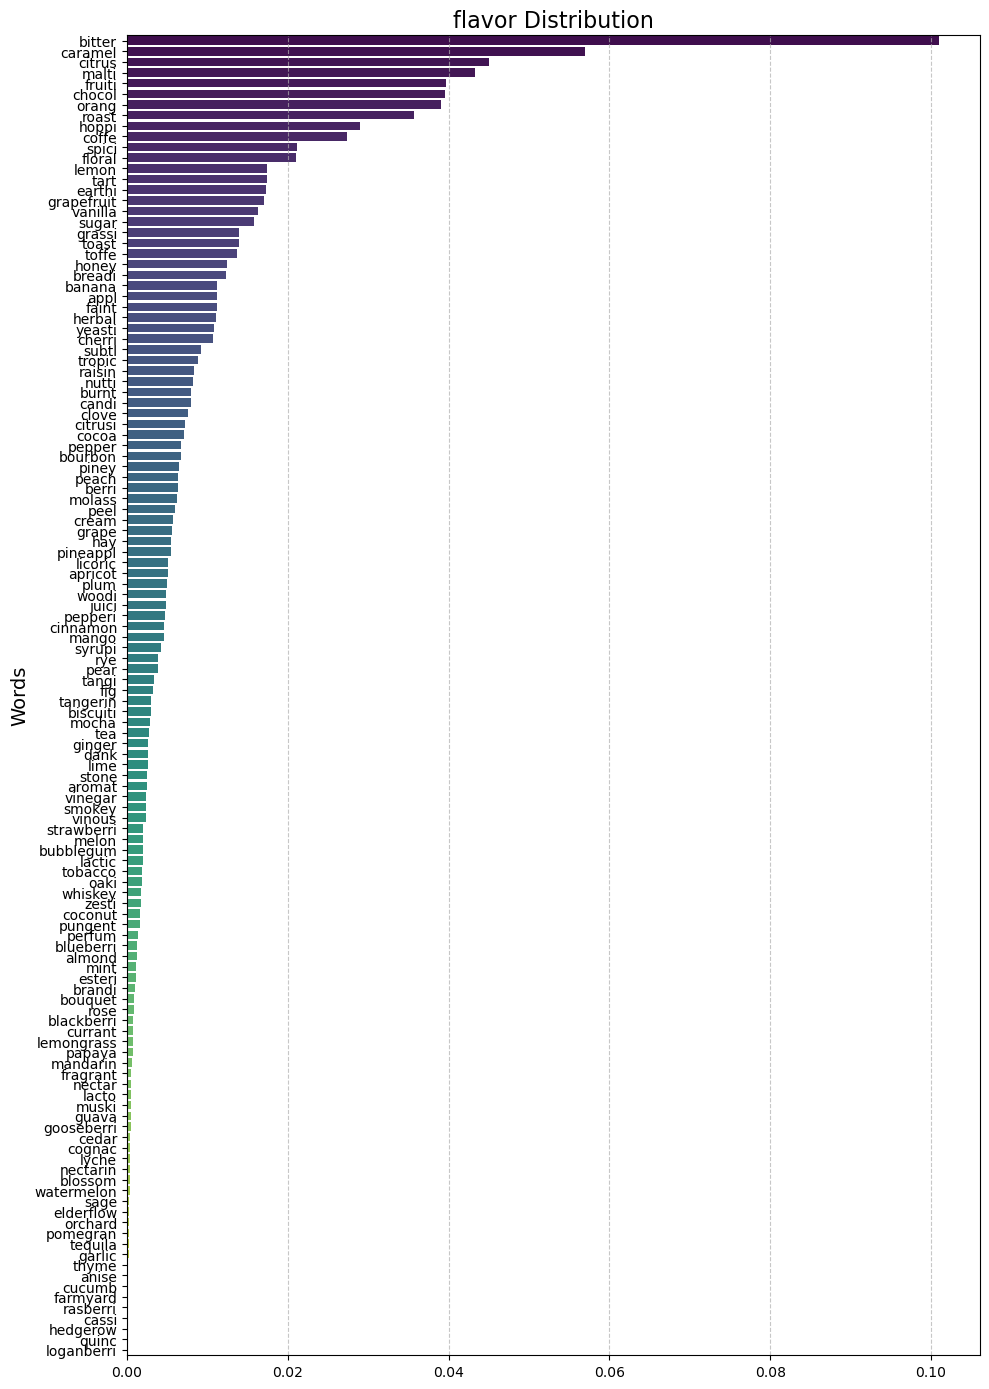

/var/folders/y0/lnx9fwjn5c75w4wndjtsp_4h0000gn/T/ipykernel_65994/3495410594.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores, y=attributes, palette="viridis")


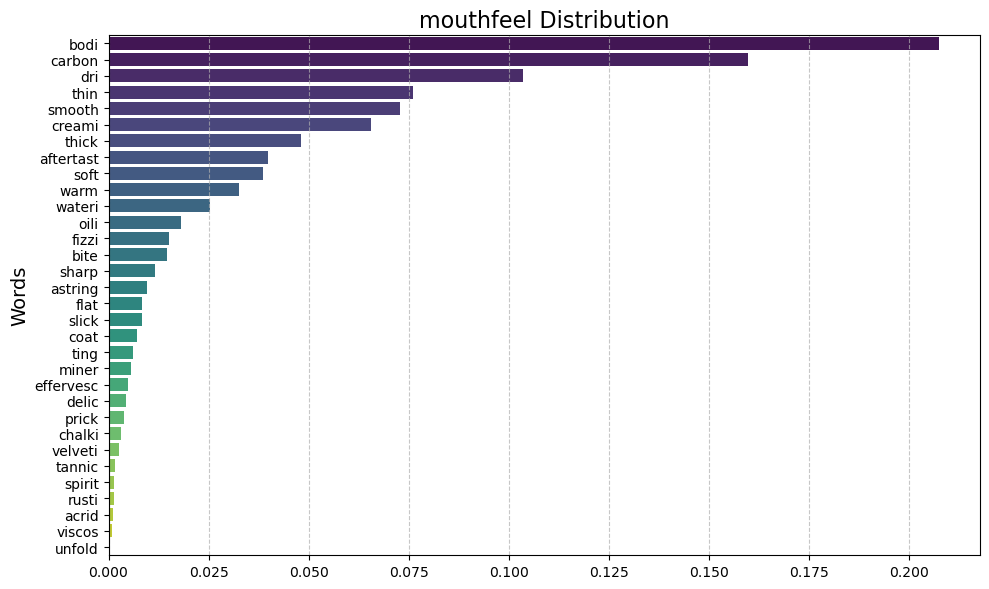

/var/folders/y0/lnx9fwjn5c75w4wndjtsp_4h0000gn/T/ipykernel_65994/3495410594.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores, y=attributes, palette="viridis")


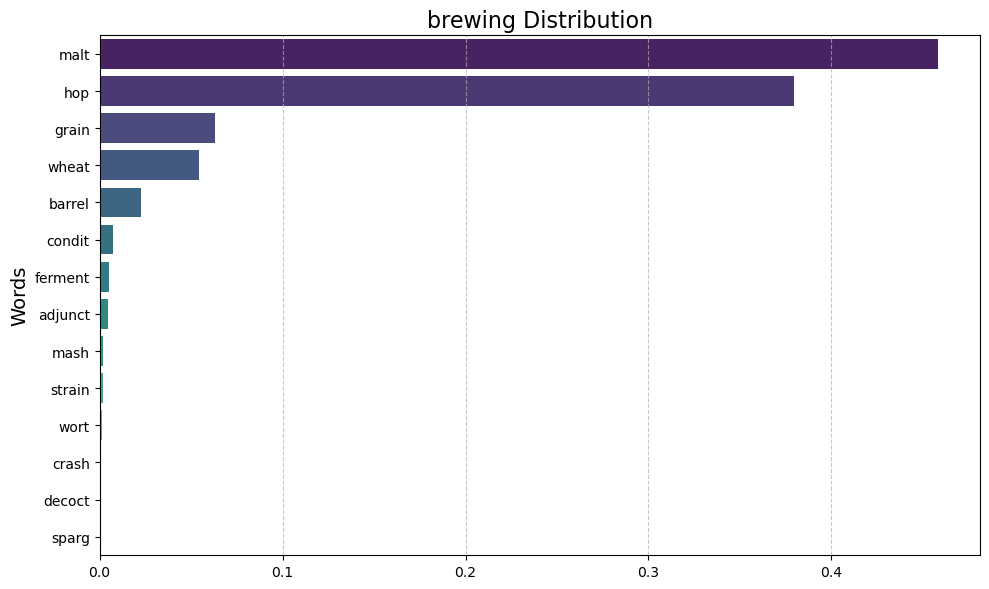

/var/folders/y0/lnx9fwjn5c75w4wndjtsp_4h0000gn/T/ipykernel_65994/3495410594.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores, y=attributes, palette="viridis")


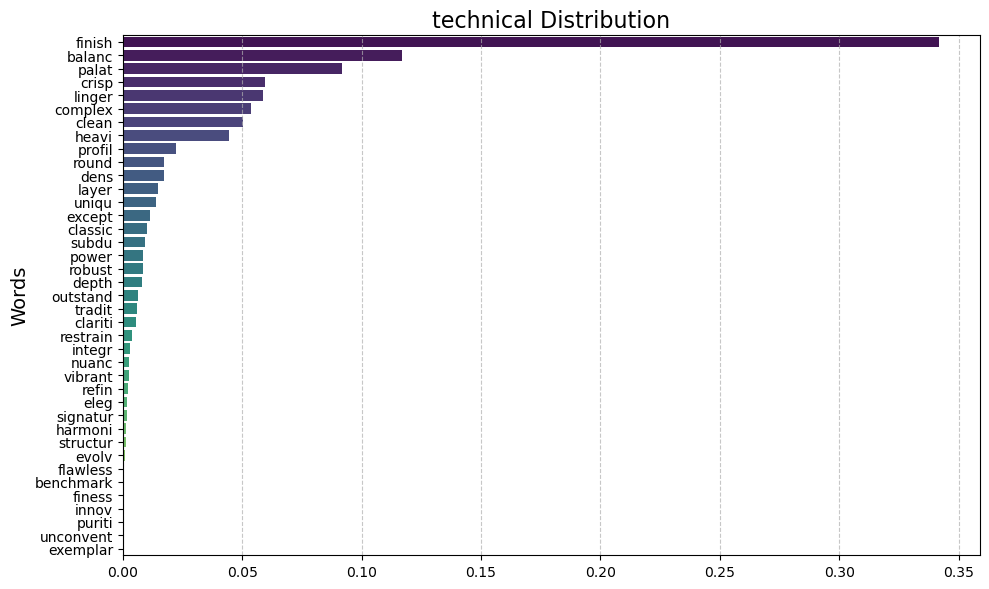

/var/folders/y0/lnx9fwjn5c75w4wndjtsp_4h0000gn/T/ipykernel_65994/3495410594.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores, y=attributes, palette="viridis")


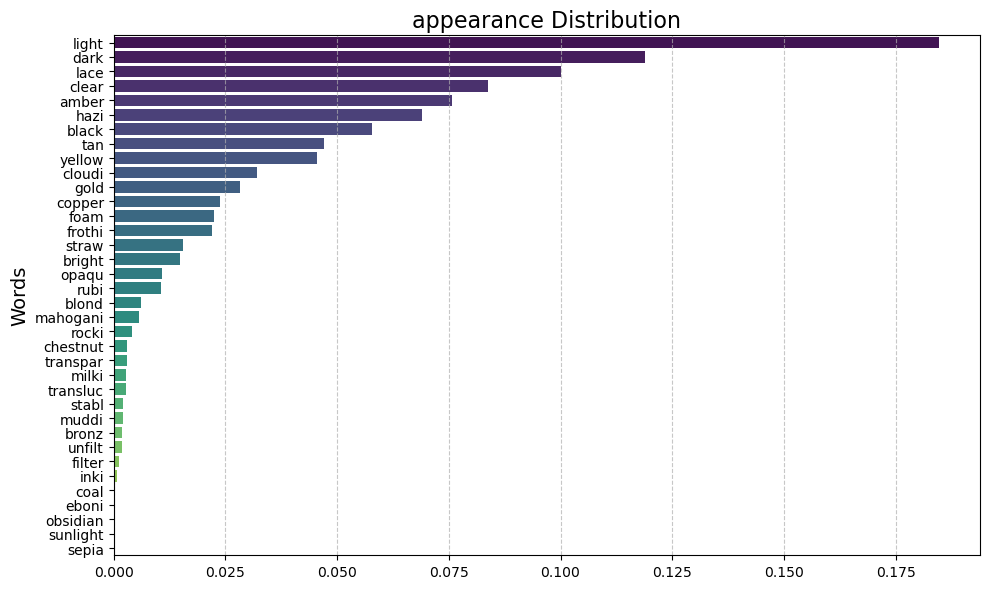

/var/folders/y0/lnx9fwjn5c75w4wndjtsp_4h0000gn/T/ipykernel_65994/3495410594.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores, y=attributes, palette="viridis")


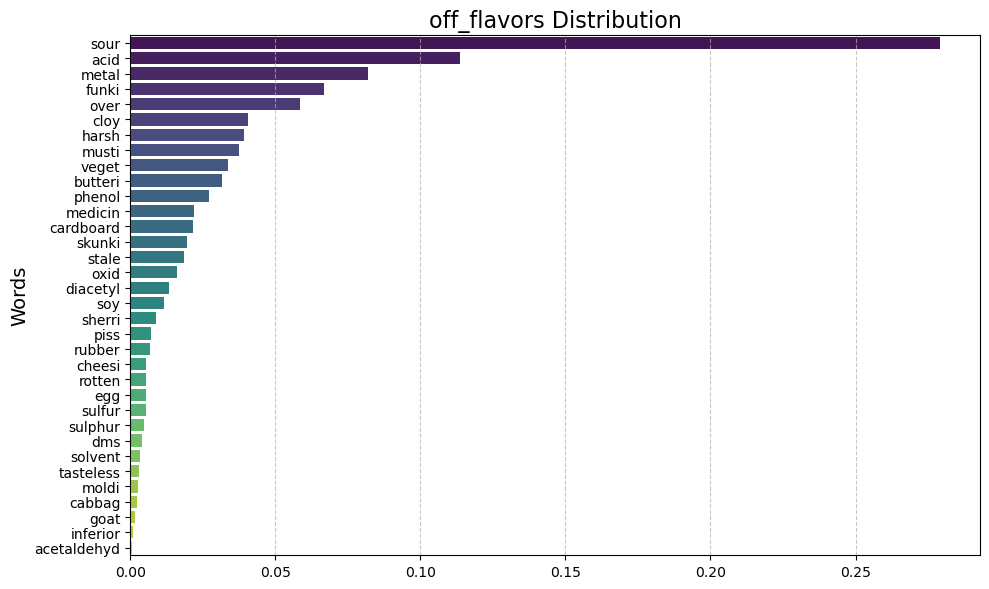

In [17]:
for key in cat_words_distribution:
    sorted_data = dict(sorted(cat_words_distribution[key].items(), key=lambda x: x[1], reverse=True))
    attributes = list(sorted_data.keys())
    scores = list(sorted_data.values())

    # Plot
    if key == 'flavor':
        plt.figure(figsize=(10 ,14))
    else:
        plt.figure(figsize=(10 ,6))
    sns.barplot(x=scores, y=attributes, palette="viridis")
    plt.title(key + " Distribution", fontsize=16)
    plt.ylabel("Words", fontsize=14)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [18]:
import json 

#dict {stem: orginal word}
exp_dict_rev = get_exp_dict_stems(data_path, reverse=True)

word_occ_dir = os.path.join(data_path, 'word_occurences')

os.makedirs(word_occ_dir, exist_ok=True)

for key in cat_words_distribution:

    to_save={}
    for word in cat_words_distribution[key].keys():
        to_save[exp_dict_rev[word]] = cat_words_distribution[key][word]
        
    sorted_data = dict(sorted(to_save.items(), key=lambda x: x[1], reverse=True))

    with open(os.path.join(word_occ_dir, key+'.json'), "w") as outfile: 
        json.dump(sorted_data, outfile)

